In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
viz = df.copy()

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(1009, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [10]:
train,test = train_test_split(df,test_size=0.2)
test_pred = test.copy()
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
188,2018-11-01,304.589996,318.450012,296.670013,317.380005,317.380005,15121500
680,2020-10-16,549.500000,554.330017,530.030029,530.789978,530.789978,6347400
122,2018-07-31,331.510010,342.500000,328.000000,337.450012,337.450012,14085400
814,2021-04-30,505.000000,514.549988,505.000000,513.469971,513.469971,4413200
287,2019-03-28,354.489990,355.940002,349.200012,354.609985,354.609985,4361000
719,2020-12-11,495.000000,503.339996,494.850006,503.220001,503.220001,3210900
648,2020-09-01,532.599976,557.390015,532.450012,556.549988,556.549988,9572700
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
668,2020-09-30,492.570007,504.630005,489.269989,500.029999,500.029999,4634100
462,2019-12-05,305.269989,306.480011,298.809998,302.859985,302.859985,4615500


In [11]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
500,2020-01-31,347.390015,347.390015,340.980011,345.089996,345.089996,5230000
159,2018-09-21,366.589996,372.220001,360.739990,361.190002,361.190002,11930600
468,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700
338,2019-06-11,355.000000,357.579987,348.500000,351.269989,351.269989,5396700
967,2021-12-07,619.830017,628.890015,611.400024,625.580017,625.580017,3125200
825,2021-05-17,485.589996,492.709991,482.809998,488.940002,488.940002,2705200
14,2018-02-26,288.750000,295.649994,287.010010,294.160004,294.160004,10268600
385,2019-08-16,298.859985,303.549988,296.269989,302.799988,302.799988,6905800
691,2020-11-02,478.869995,486.299988,475.000000,484.119995,484.119995,4408200
239,2019-01-17,349.500000,355.790009,346.410004,353.190002,353.190002,18871200


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.33510287]


In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 16.397
RMSE 4.049
MAE 2.923
MAPE 0.007
R2 Score :  0.999


In [ ]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    

    ax.spines['left'].set_color('white')        
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      

    ax.set_facecolor("black")

In [20]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [21]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


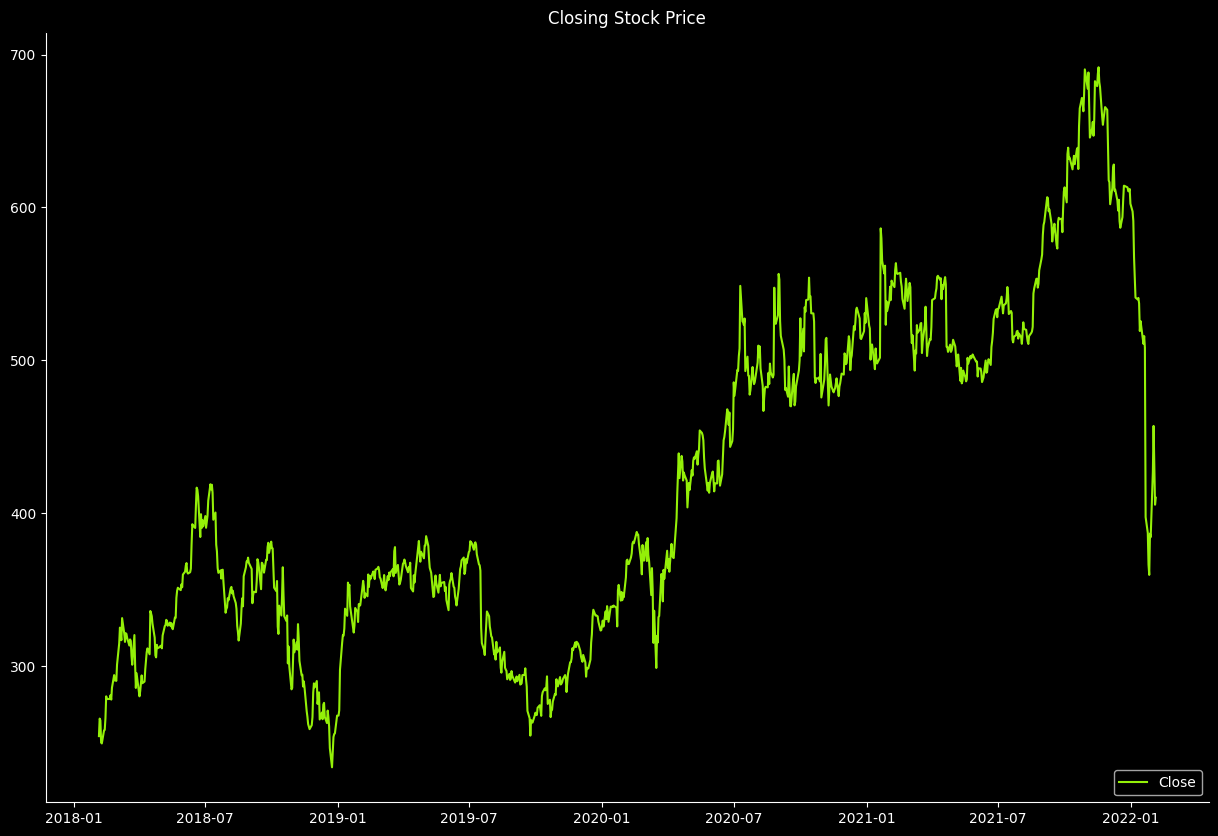

In [22]:
style()
plt.title('Closing Stock Price',color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

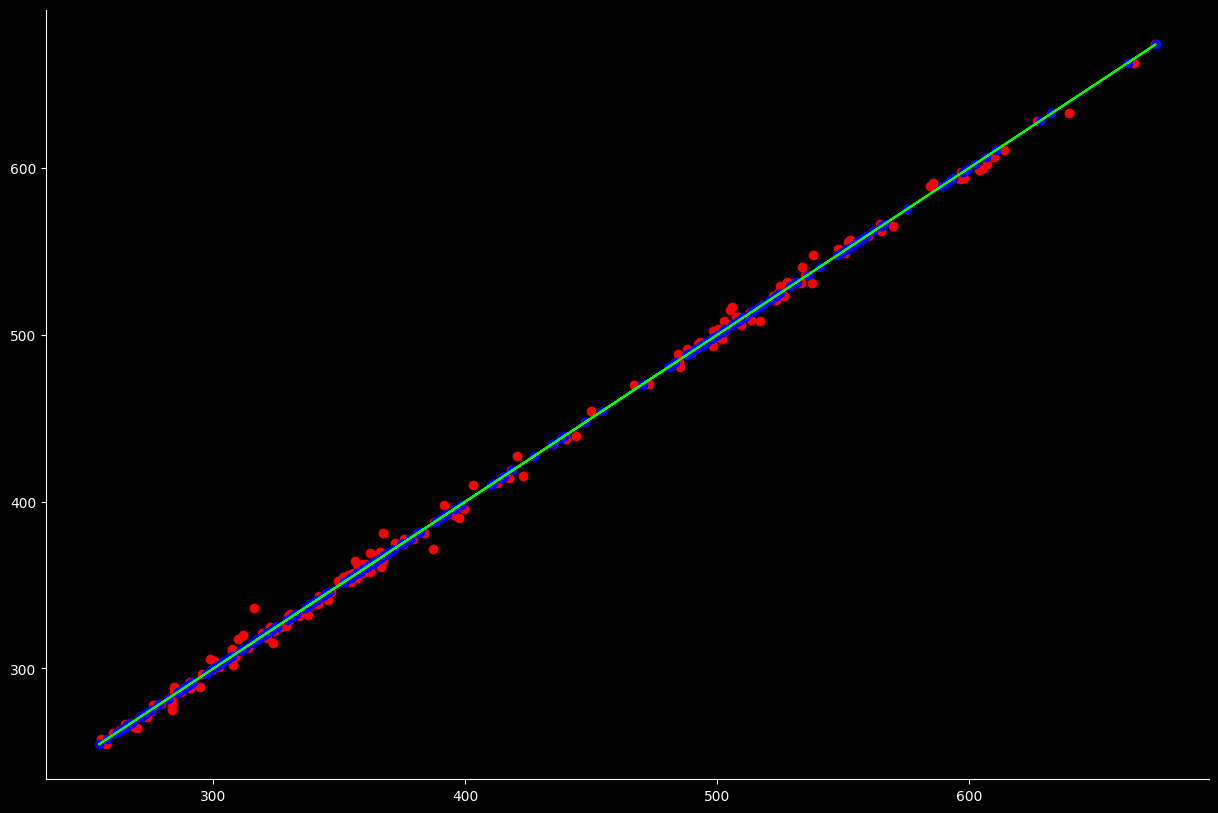

In [23]:
style()
plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [28]:
test_pred['Close_Prediction']=y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close Prediction,Close_Prediction
188,2018-11-01,304.589996,318.450012,296.670013,317.380005,317.380005,15121500,309.907744,309.907744
680,2020-10-16,549.500000,554.330017,530.030029,530.789978,530.789978,6347400,537.579697,537.579697
122,2018-07-31,331.510010,342.500000,328.000000,337.450012,337.450012,14085400,338.315716,338.315716
814,2021-04-30,505.000000,514.549988,505.000000,513.469971,513.469971,4413200,512.950249,512.950249
287,2019-03-28,354.489990,355.940002,349.200012,354.609985,354.609985,4361000,351.438954,351.438954
...,...,...,...,...,...,...,...,...,...
393,2019-08-28,289.470001,292.820007,287.750000,291.769989,291.769989,3955700,290.739315,290.739315
353,2019-07-02,374.890015,376.000000,370.309998,375.429993,375.429993,3625000,372.140005,372.140005
501,2020-02-03,347.239990,359.630005,346.279999,358.000000,358.000000,6670600,356.494788,356.494788
138,2018-08-22,338.489990,346.209991,337.410004,344.440002,344.440002,8930700,344.298355,344.298355


In [29]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,409.194008,106.918434,254.589996,321.480004,369.524994,503.209999,674.049988
Close_Prediction,202.0,409.135709,106.964340,255.441672,321.705353,367.464988,502.544946,673.731643


In [30]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [31]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-07,264.559998,269.842467
2018-02-08,NaN,NaN
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
2018-02-11,NaN,NaN
...,...,...
2022-01-31,427.140015,420.645857
2022-02-01,NaN,NaN
2022-02-02,NaN,NaN


In [32]:
output.to_csv('Close_Prediction.csv',index=True)
print("CSV successfully saved")

CSV successfully saved


In [33]:
data = pd.read_csv('Close_Prediction.csv')
data.head(10)

,Date,Close,Close_Prediction
0,2018-02-07,264.559998,269.842467
1,2018-02-08,NaN,NaN
2,2018-02-09,NaN,NaN
3,2018-02-10,NaN,NaN
4,2018-02-11,NaN,NaN
5,2018-02-12,257.950012,255.441672
6,2018-02-13,NaN,NaN
7,2018-02-14,NaN,NaN
8,2018-02-15,NaN,NaN
9,2018-02-16,278.519989,279.247332
